Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.2) 트위터 API로 연관 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 키워드 추출]
- [<Step3. 분석> : 연관 분석을 이용한 키워드 분석](#<Step3.-분석>-:-연관-분석을-이용한-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [3]:
# -*- coding: utf-8 -*-

# 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게끔 만드는 것
#브라우저 내부(inline)에 바로 그려지도록 해주는 코드
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]
- API 사용법 참고 : https://github.com/yoonkt200/python-data-analysis/blob/master/chapter_text/(%EC%B0%B8%EA%B3%A0)%20using-twitter-api.ipynb
- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install tweepy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- [2022.02.04 ] tweepy 4 버전 설치시 api.search에서 에러 발생 => tweepy 3 버전으로 설치
- pip install tweepy==3.10.0

In [4]:
!pip install tweepy
# tweepy 3 버전으로 설치
!pip install tweepy==3.10.0

-----

##### 트위터 API 가져오기
- 트위터의 키워드 크롤링 기능을 사용하기 위해 트위터 앱에서 발급받은 KEY와 TOKEN 정보를 입력
- 총 4가지 정보를 입력하여 코드 실행
- tweepy의 OAuthHandler() 클래스가 자동으로 개인정보 인증 완료

In [5]:
import tweepy

# 발급 완료된 키 입력
CONSUMER_KEY = "LUCHdCDyarrHrZtB3TphjDPDX"
CONSUMER_SECRET = "cEVd1dTmutWmiISeXlIk7UNZ5qbRlRVJVMg9l4Elvz5GU8doAd"
ACCESS_TOKEN_KEY = "169786640-GXkvSASVzzWCVgIgEtO91ENvZCEE4iGIFde9MDyW"
ACCESS_TOKEN_SECRET = "xC6ghbPWdEKBmBE8Oi6cVdgVVsRzFpmFLINHLcOksa4QA"

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth)

In [6]:
# tweepy 버전 출력
tweepy.__version__

'3.10.0'

-----

#### '손흥민' 키워드 검색

In [53]:
# Twitter Developer Platform의 Data dictionary 참조
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

# twitter API를 사용하여 '손흥민' 이 포함된 트윗들을 크롤링한 뒤, 'user_mentions'와 'hashtags' 속성값 추출
keyword = "개발자"

# 특정 키워드 크롤링은  search() 함수 수행
tweets = api.search(keyword)

# entities() 함수로 특정 속성의 메타데이터에 접근하여 정보 추출
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at) # 트윗이 생성된 UTC 시간, 예) "2022-02-04 01:47:09"

RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]
개발자의 할머니가 뜨개질로 만드신 포토카드 홀더예요!
[참여 방법]
1. #RT 해주세요!
2. 멘션으로 #최애마켓손뜨개최애자랑대회 해시태그를 달고 본인의 최애 자랑 + 받고…
[{'screen_name': 'choiaemarket', 'name': '최애마켓', 'id': 1430468644903944195, 'id_str': '1430468644903944195', 'indices': [3, 16]}]
[{'text': 'RT', 'indices': [82, 85]}, {'text': '최애마켓손뜨개최애자랑대회', 'indices': [100, 114]}]
2022-02-10 06:04:35
RT @kstartupceo: 저는 시니어 직원들에게도 실무를 직접 하라고 강조합니다. 시니어 개발자는 3인분 시스템을 직접 만들고, 시니어 기획자는 3인분 피쳐를 직접 설계하고, 마케터는 3인분 채널을 운영해야합니다. 매니징하라고 데려온게 아니라…
[{'screen_name': 'kstartupceo', 'name': '스타트업 김대표', 'id': 1469635921511600134, 'id_str': '1469635921511600134', 'indices': [3, 15]}]
[]
2022-02-10 06:04:25
RT @Ghiblibli1: 미국에서  부트캠프 + 콜드이메일로 레퍼런스 받아서 개발자 취업하신 분 인터뷰하는데 "콜드이메일 많이 했다"고 할 때는 그런가보다 하다 인터뷰 말미에 학연 지연 경력 없이 링크드인 인맥 0명에서 500명 만들었다는 소리…
[{'screen_name': 'Ghiblibli1', 'name': '논문으로 고통받는 감자', 'id': 1037731518838231041, 'id_str': '1037731518838231041', 'indices': [3, 14]}]
[]
2022-02-10 06:04:20
RT @choiaemarket: [할머니의 손뜨개

In [54]:
tweets

[Status(_api=<tweepy.api.API object at 0x0000015E13621AC0>, _json={'created_at': 'Thu Feb 10 06:04:35 +0000 2022', 'id': 1491654308793765889, 'id_str': '1491654308793765889', 'text': 'RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의 할머니가 뜨개질로 만드신 포토카드 홀더예요!\n[참여 방법]\n1. #RT 해주세요!\n2. 멘션으로 #최애마켓손뜨개최애자랑대회 해시태그를 달고 본인의 최애 자랑 + 받고…', 'truncated': False, 'entities': {'hashtags': [{'text': 'RT', 'indices': [82, 85]}, {'text': '최애마켓손뜨개최애자랑대회', 'indices': [100, 114]}], 'symbols': [], 'user_mentions': [{'screen_name': 'choiaemarket', 'name': '최애마켓', 'id': 1430468644903944195, 'id_str': '1430468644903944195', 'indices': [3, 16]}], 'urls': []}, 'metadata': {'result_type': 'recent', 'iso_language_code': 'ko'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1181578899970330625, '

-----

##### 데이터 프레임 형태로 수집

In [55]:
# 크롤링된 데이터를 저장할 데이터 프레임 생성
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 크롤링을 수행할 갯수를 입력
max_tweets = 1000

# Cursor 객체를 사용하여 크롤링 수행
# Cursor()로 keyword의 값에 해당하는 정보를  items()으로 지정한 갯수만큼 크롤링
searched_tweets = [status for status in tweepy.Cursor(api.search, q=keyword).items(max_tweets)]

# ‘손흥민’이 포함된 1000개의 트윗들에서, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장
for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet_json['text']
    created = tweet_json['created_at']
    row = [created, tweet_text]
    series = pd.Series(row, index=df.columns) #  created, tweet_text로 시리즈를 생성
    df = df.append(series, ignore_index=True) # 생성된 시리즈를 데이터프레임에 추가

In [56]:
# 데이터 프레임 상위 5개 출력
df.head()

,created,tweet_text
0,Thu Feb 10 06:04:35 +0000 2022,RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의...
1,Thu Feb 10 06:04:25 +0000 2022,RT @kstartupceo: 저는 시니어 직원들에게도 실무를 직접 하라고 강조합니...
2,Thu Feb 10 06:04:20 +0000 2022,RT @Ghiblibli1: 미국에서 부트캠프 + 콜드이메일로 레퍼런스 받아서 개...
3,Thu Feb 10 06:03:54 +0000 2022,RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의...
4,Thu Feb 10 06:03:44 +0000 2022,RT @espressivo_h: 나도 옷차림+성별 때문에 “개발자 아닌 줄 알았다....


In [57]:
# 데이터 프레임을 csv 로 저장
# df.to_csv("tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]
- 한글 문자열을 기준으로 키워드 추출 수행
- tweet_text 데이터에서 한글 문자열만을 추출하여 ko_text 생성

In [58]:
#df = pd.read_csv("tweet_temp.csv")
#df.head()

In [59]:
# 정규표현 라이브러리
import re

# 텍스트 정제 함수 : 한글 및 띄어쓰기 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [60]:
# 텍스트 정제 함수text_cleaning()를 ‘tweet_text’ 피처에 이를 적용, 한글과 띄어쓰기만 추출하여 ko_text 피처 생성
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Thu Feb 10 06:04:35 +0000 2022,RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의...,할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 ...
1,Thu Feb 10 06:04:25 +0000 2022,RT @kstartupceo: 저는 시니어 직원들에게도 실무를 직접 하라고 강조합니...,저는 시니어 직원들에게도 실무를 직접 하라고 강조합니다 시니어 개발자는 인분 시...
2,Thu Feb 10 06:04:20 +0000 2022,RT @Ghiblibli1: 미국에서 부트캠프 + 콜드이메일로 레퍼런스 받아서 개...,미국에서 부트캠프 콜드이메일로 레퍼런스 받아서 개발자 취업하신 분 인터뷰하는...
3,Thu Feb 10 06:03:54 +0000 2022,RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의...,할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 ...
4,Thu Feb 10 06:03:44 +0000 2022,RT @espressivo_h: 나도 옷차림+성별 때문에 “개발자 아닌 줄 알았다....,나도 옷차림성별 때문에 개발자 아닌 줄 알았다 라는 얘기를 정말 많이 들었는데 ...


-----

### [konlpy를 이용한 키워드 추출]
- 명사만 추출한 후 불용어 및 한글자 키워드 제거

In [61]:
from konlpy.tag import Okt
from collections import Counter

# 불용어 사전의 텍스트 문서 읽어 stopwords 리스트 생성
# 한국어 약식 불용어사전 예시 파일, 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords] # strip()으로 공백 및 줄바꿈 제거

# 품사 중 명사만 추출하여 한글자 키워드 및 불용어 제거
# Okt(Open Korean Text)는 트위터에서 만든 오픈소스 한국어 처리기인 twitter-korean-text를 이어받아 만들고 있는 프로젝트

def get_nouns(x):
    # 명사만 추출
    nouns_tagger = Okt() # Okt()클래스 선언
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [62]:
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [63]:
# ‘ko_text’ 피처에 get_nouns() 함수를 적용하여 불용어 및 한글자를 제거한 명사 추출하여 'nouns' 피처 생성
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape) # 행과 열의 갯수를 튜플로 반환
df.head()

(1000, 4)


,created,tweet_text,ko_text,nouns
0,Thu Feb 10 06:04:35 +0000 2022,RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의...,할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 ...,"[할머니, 포토, 카드, 홀더, 이벤트, 개발자, 할머니, 뜨개질, 포토, 카드, ..."
1,Thu Feb 10 06:04:25 +0000 2022,RT @kstartupceo: 저는 시니어 직원들에게도 실무를 직접 하라고 강조합니...,저는 시니어 직원들에게도 실무를 직접 하라고 강조합니다 시니어 개발자는 인분 시...,"[시니어, 직원, 실무, 직접, 하라, 강조, 시니어, 개발자, 인분, 시스템, 직..."
2,Thu Feb 10 06:04:20 +0000 2022,RT @Ghiblibli1: 미국에서 부트캠프 + 콜드이메일로 레퍼런스 받아서 개...,미국에서 부트캠프 콜드이메일로 레퍼런스 받아서 개발자 취업하신 분 인터뷰하는...,"[미국, 부트캠프, 콜드, 이메일, 레퍼런스, 개발자, 취업, 인터뷰, 콜드, 이메..."
3,Thu Feb 10 06:03:54 +0000 2022,RT @choiaemarket: [할머니의 손뜨개 포토카드 홀더 이벤트]\n개발자의...,할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 ...,"[할머니, 포토, 카드, 홀더, 이벤트, 개발자, 할머니, 뜨개질, 포토, 카드, ..."
4,Thu Feb 10 06:03:44 +0000 2022,RT @espressivo_h: 나도 옷차림+성별 때문에 “개발자 아닌 줄 알았다....,나도 옷차림성별 때문에 개발자 아닌 줄 알았다 라는 얘기를 정말 많이 들었는데 ...,"[옷차림, 성별, 때문, 개발자, 얘기, 정말, 형태, 개발자, 일도, 개발자]"


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

### [연관 규칙]
- https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/
- 연관규칙 (아프리오리, Apriori 알고리즘) https://blog.naver.com/zzz90zzz/221807210555
- 연관규칙은 비지도학습으로 대규모 거래 데이터로 부터 함께 구매될 규칙을 도출하여 고객이 특정 상품 구매시 이와 연관성이 높은 상품을 추천하는 것
- Apriori 알고리즘 : 간단한 성능 측정치를 이용해 거대한 DB에서 데이터간의 연관성을 찾는 알고리즘
### [ 연관규칙에서 사용하는 3가지 통계척도 ]
- 1. 지지도 (support)  : 특정 아이템이 데이터에서 발생하는 빈도 
- 2. 신뢰도 (confidence) : 두 아이템의 연관규칙이 유용한 규칙일 가능성의 척도 
- 3. 향상도 (lift) : 두 아이템의 연관 규칙이 우연인지 아닌지를 나타내는 척도 

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
    - (env_name) `pip install apriori apyori`
- 혹은 아래의 코드로 라이브러리를 설치

In [64]:
!pip install apriori apyori

##### 연관 분석 연습

In [65]:
##### 연관 분석 연습 1
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]

# 연관 분석을 수행
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [66]:
##### 연관 분석 연습 2

# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인) 처럼 규칙의 크기가 2 이하인 규칙을 추출
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'케인', '손흥민'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인', '손흥민'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

-----

##### 트위터 연관 키워드 분석

In [67]:
# 트랜잭션 데이터를 추출
transactions = df['nouns'].tolist()
#transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지
print(transactions)

[['할머니', '포토', '카드', '홀더', '이벤트', '개발자', '할머니', '뜨개질', '포토', '카드', '홀더', '참여', '방법', '멘션', '최애', '마켓', '개최', '애자', '대회', '해시태그', '본인', '최애', '자랑'], ['시니어', '직원', '실무', '직접', '하라', '강조', '시니어', '개발자', '인분', '시스템', '직접', '시니어', '기획', '인분', '직접', '설계', '마케터', '인분', '채널', '운영', '매니'], ['미국', '부트캠프', '콜드', '이메일', '레퍼런스', '개발자', '취업', '인터뷰', '콜드', '이메일', '런가', '인터뷰', '말미', '학연', '지연', '경력', '링크드인', '인맥', '소리'], ['할머니', '포토', '카드', '홀더', '이벤트', '개발자', '할머니', '뜨개질', '포토', '카드', '홀더', '참여', '방법', '멘션', '최애', '마켓', '개최', '애자', '대회', '해시태그', '본인', '최애', '자랑'], ['옷차림', '성별', '때문', '개발자', '얘기', '정말', '형태', '개발자', '일도', '개발자'], ['양쪽', '개발자', '유입', '진짜'], ['다크', '모드', '일전', '트위터', '언급', '지금', '개발자', '서버', '유저', '접속', '유저', '업뎃', '예정', '듯함', '공지', '이제', '토큰', '기능', '위치', '양임'], ['상관', '일만', '자꾸', '외모', '어쩌구', '거리', '개발자', '힙스터', '인척', '제일', '힙스터'], ['다크', '모드', '일전', '트위터', '언급', '지금', '개발자', '서버', '유저', '접속', '유저', '업뎃', '예정', '듯함', '공지', '이제', '토큰', '기능', '위치', '양임'], ['할머니', '포토', '카드', '홀더', '이벤트'

In [68]:
# 연관 분석을 수행
#적당한 superset 규칙을 설정한뒤 연관 규칙을 추출하여 results에 저장 

results = list(apriori(transactions,
                       min_support=0.05,
                       min_confidence=0.1,
                       min_lift=5,
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'경력', '런가'}), support=0.088, ordered_statistics=[OrderedStatistic(items_base=frozenset({'경력'}), items_add=frozenset({'런가'}), confidence=1.0, lift=11.363636363636365), OrderedStatistic(items_base=frozenset({'런가'}), items_add=frozenset({'경력'}), confidence=1.0, lift=11.363636363636365)]), RelationRecord(items=frozenset({'경력', '레퍼런스'}), support=0.088, ordered_statistics=[OrderedStatistic(items_base=frozenset({'경력'}), items_add=frozenset({'레퍼런스'}), confidence=1.0, lift=11.363636363636365), OrderedStatistic(items_base=frozenset({'레퍼런스'}), items_add=frozenset({'경력'}), confidence=1.0, lift=11.363636363636365)]), RelationRecord(items=frozenset({'경력', '링크드인'}), support=0.088, ordered_statistics=[OrderedStatistic(items_base=frozenset({'경력'}), items_add=frozenset({'링크드인'}), confidence=1.0, lift=11.363636363636365), OrderedStatistic(items_base=frozenset({'링크드인'}), items_add=frozenset({'경력'}), confidence=1.0, lift=11.363636363636365)]), RelationRecord(items=frozenset

In [69]:
for result in results:
    print(result)

RelationRecord(items=frozenset({'경력', '런가'}), support=0.088, ordered_statistics=[OrderedStatistic(items_base=frozenset({'경력'}), items_add=frozenset({'런가'}), confidence=1.0, lift=11.363636363636365), OrderedStatistic(items_base=frozenset({'런가'}), items_add=frozenset({'경력'}), confidence=1.0, lift=11.363636363636365)])
RelationRecord(items=frozenset({'경력', '레퍼런스'}), support=0.088, ordered_statistics=[OrderedStatistic(items_base=frozenset({'경력'}), items_add=frozenset({'레퍼런스'}), confidence=1.0, lift=11.363636363636365), OrderedStatistic(items_base=frozenset({'레퍼런스'}), items_add=frozenset({'경력'}), confidence=1.0, lift=11.363636363636365)])
RelationRecord(items=frozenset({'경력', '링크드인'}), support=0.088, ordered_statistics=[OrderedStatistic(items_base=frozenset({'경력'}), items_add=frozenset({'링크드인'}), confidence=1.0, lift=11.363636363636365), OrderedStatistic(items_base=frozenset({'링크드인'}), items_add=frozenset({'경력'}), confidence=1.0, lift=11.363636363636365)])
RelationRecord(items=frozenset({'경

In [70]:
# 네트워크 그래프의 '관게' 역항르 하는 선 생성
# network_df의 연관 분석 데이터를 기반으로 네트워크 그래프의 '관계' 역할을 하는 선을 생성 
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items] #items의 2개 값을 items 리스트에 저장 
        row = [items[0], items[1], result.support] #row 에 item[0], item[1], result의 support 값으로 row 시리즈 생성 
        series = pd.Series(row, index=network_df.columns) #시리즈 형태로 만들기 
        network_df = network_df.append(series, ignore_index=True)# 시리즈를 network_df 데이터 프레임에 추가 

network_df.head()

,source,target,support
0,경력,런가,0.088
1,경력,레퍼런스,0.088
2,경력,링크드인,0.088
3,경력,말미,0.088
4,미국,경력,0.088


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [71]:
# 말뭉치를 추출합
tweet_corpus = "".join(df['ko_text'].tolist()) #ko_text 값을 리스트 형태로 변환 ->join() 으로 문자열 형태로 변환 
print(tweet_corpus)

  할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 홀더예요참여 방법  해주세요 멘션으로 최애마켓손뜨개최애자랑대회 해시태그를 달고 본인의 최애 자랑  받고  저는 시니어 직원들에게도 실무를 직접 하라고 강조합니다 시니어 개발자는 인분 시스템을 직접 만들고 시니어 기획자는 인분 피쳐를 직접 설계하고 마케터는 인분 채널을 운영해야합니다 매니징하라고 데려온게 아니라  미국에서  부트캠프  콜드이메일로 레퍼런스 받아서 개발자 취업하신 분 인터뷰하는데 콜드이메일 많이 했다고 할 때는 그런가보다 하다 인터뷰 말미에 학연 지연 경력 없이 링크드인 인맥 명에서 명 만들었다는 소리  할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 홀더예요참여 방법  해주세요 멘션으로 최애마켓손뜨개최애자랑대회 해시태그를 달고 본인의 최애 자랑  받고  나도 옷차림성별 때문에 개발자 아닌 줄 알았다 라는 얘기를 정말 많이 들었는데 우리는 보다 다양한 형태의 개발자가 필요하다고 믿는다 일도 잘 하고 멋도 잘 내는 개발자 얼마나 멋진가들리는 말로는 서양쪽 개발자들이 많이 유입되서 그런거라는 썰이 있던데 진짜일까  롤 다크모드 일전쯤에 트위터에서 언급하더니 지금은 개발자 서버에 들어가 있고  유저는 접속 가능한듯함 전유저 업뎃 예정인듯함 공지 이쪽 그리고 뭣보다 이제 토큰 잠금 기능 위치 잠금 이 생긴다는 모양임뭘 입든 뭔 상관이야 일만 잘하면 되는데 자꾸 옷이 어떠하니 외모가 어쩌구 거리는거 짜증남그리고 개발자 놈들 맨날 힙스터인척 하면서 제일 힙스터아님   롤 다크모드 일전쯤에 트위터에서 언급하더니 지금은 개발자 서버에 들어가 있고  유저는 접속 가능한듯함 전유저 업뎃 예정인듯함 공지 이쪽 그리고 뭣보다 이제 토큰 잠금 기능 위치 잠금 이 생긴다는 모양임  할머니의 손뜨개 포토카드 홀더 이벤트개발자의 할머니가 뜨개질로 만드신 포토카드 홀더예요참여 방법  해주세요 멘션으로 최애마켓손뜨개최애자랑대회 해시태그를 달고 본인의 최애 자랑  받고 

In [72]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출, 빈도수 계산
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus) 
count = Counter(nouns)

# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'개발자': 1127, '포토': 673, '홀더': 673, '할머니': 672, '카드': 672, '최애': 672, '본인': 339, '이벤트': 337, '방법': 337, '뜨개질': 336, '참여': 336, '멘션': 336, '마켓': 336, '개최': 336, '애자': 336, '대회': 336, '해시태그': 336, '자랑': 336, '트친': 243, '유저': 236, '인터뷰': 185, '콜드': 176, '이메일': 176, '지금': 123, '미국': 120, '모드': 119, '접속': 118, '예정': 118, '이제': 118, '토큰': 118, '다크': 117, '일전': 117, '트위터': 117, '언급': 117, '서버': 117, '업뎃': 117, '듯함': 117, '공지': 117, '기능': 117, '위치': 117, '양임': 116, '취업': 101, '소리': 89, '부트캠프': 88, '레퍼런스': 88, '런가': 88, '말미': 88, '학연': 88, '지연': 88, '경력': 88, '링크드인': 88, '인맥': 88, '때문': 57, '정말': 56, '우리': 56, '얘기': 55, '옷차림': 53, '성별': 53, '형태': 53, '일도': 53, '얼마나': 53, '영상': 53, '개발': 43, '시스템': 39, '시니어': 36, '직접': 36, '인분': 36, '능력': 28, '북디자이너': 26, '커뮤': 26, '구현': 26, '날북': 26, '자컾': 26, '외치': 26, '다른사람': 26, '의뢰': 26, '게임': 21, '생각': 19, '기획': 18, '회사': 18, '다른': 18, '트친소': 16, '싱글': 15, '엔지니어': 15, '권장': 15, '대한': 14, '여성': 14, '브라우저': 14, '주소창': 14, '치면': 14, '직원': 13, '운영': 13

-----

##### 단어 빈도 점수 추가

In [73]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
0,할머니,672
1,포토,673
2,카드,672
3,홀더,673
4,이벤트,337


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install networkx`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- networkx 버전 2.3 이하를 설치하는 경우, 아래 코드를 다음과 같이 바꿔주어야 합니다.
    - `sizes = [G.nodes[node]['nodesize']*25 for node in G]` -> `sizes = [G.node[node]['nodesize']*25 for node in G]`

In [74]:
#네트워크 시각화를 위한 라이브러리 설치 
!pip install networkx

-----

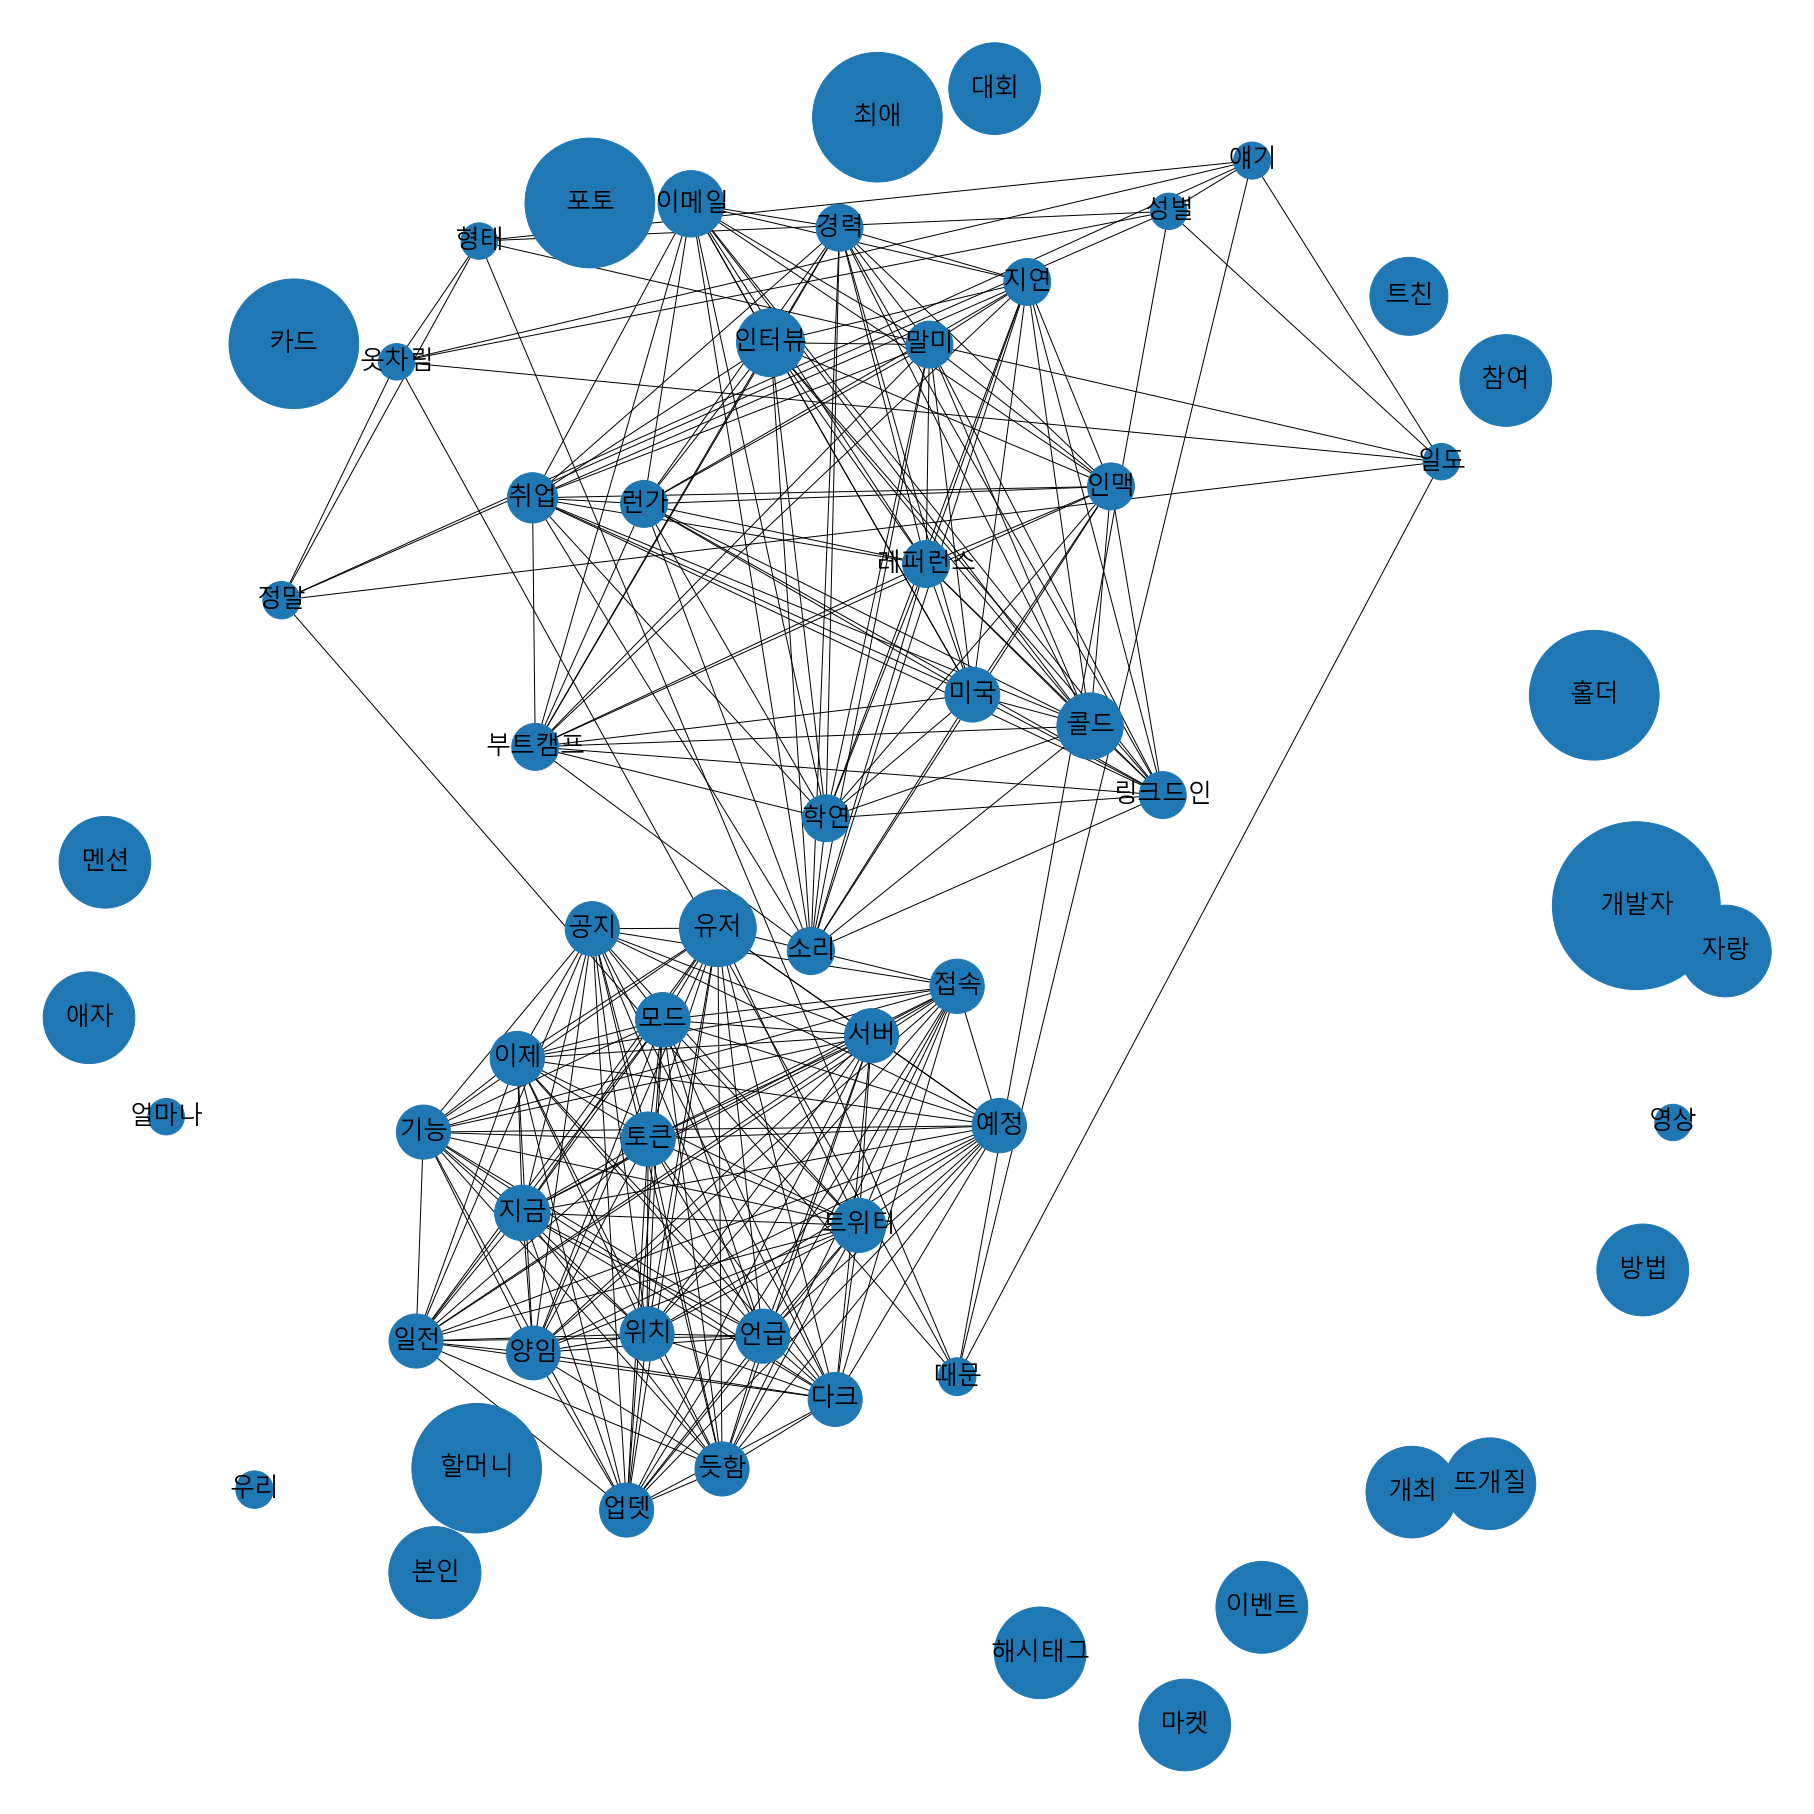

In [75]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성 add_node()
for index, row in node_df.iterrows():#node_df 데이터 프레임의 행을 순회하면서 각 행의 값을 시리즈로 반환
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
for index, row in network_df.iterrows(): #.add_weighted_edges_from 
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정
pos = nx.spring_layout(G, k=0.6, iterations=50)
# nx.draw(G, pos=pos)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)


# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력
# nx.draw_networkx_labels(G, pos=pos, font_family='NanumGothic', font_size=25)
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력
ax = plt.gca()
plt.show()